### Scikit-learn

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X,y = fetch_california_housing(return_X_y=True)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [6]:
mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
#pipe.get_params()

In [7]:
#pipe.fit(X,y)

In [8]:
#mod.predict(X)

In [9]:
#pred = pipe.predict(X)

In [10]:
#plt.scatter(pred, y)

In [11]:
GridSearchCV(estimator=pipe,
             param_grid={'model_n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
            cv=3)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model_n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [12]:
#mod.fit(X, y);
#pd.DataFrame(mod.cv_results_)

### Preprocessing


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [14]:
df = pd.read_csv("/Users/elifyildiz/Desktop/drawndata1.csv")  

In [15]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [16]:
X = df[['x', 'y']].values
y = df['z'] == "a"

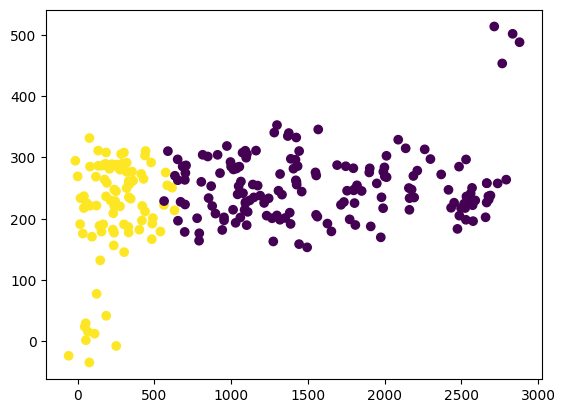

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y);

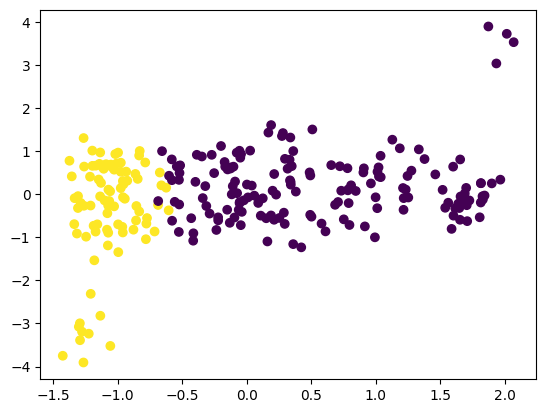

In [18]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

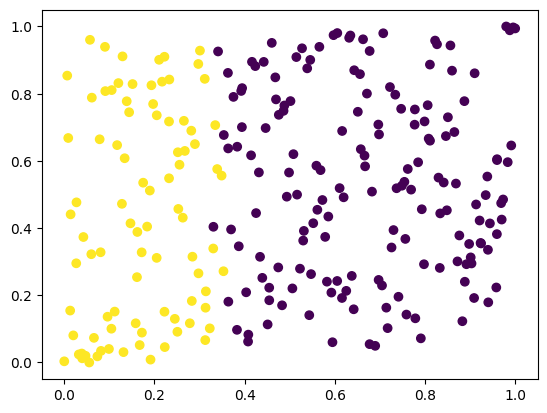

In [19]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

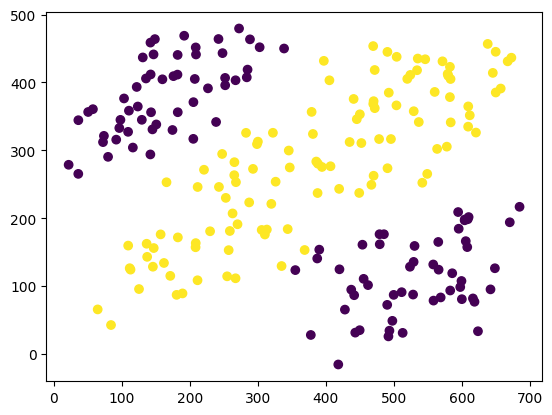

In [20]:
df = pd.read_csv("/Users/elifyildiz/Desktop/drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

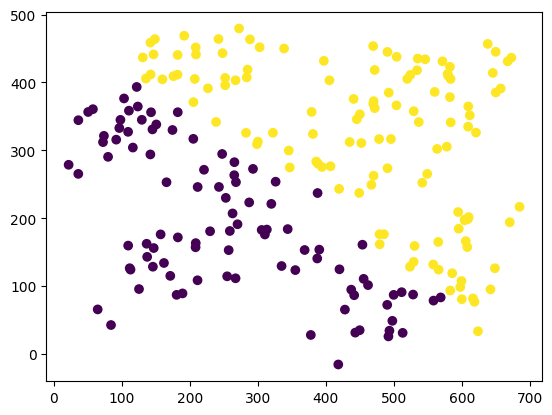

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])
pred = pipe.fit(X,y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

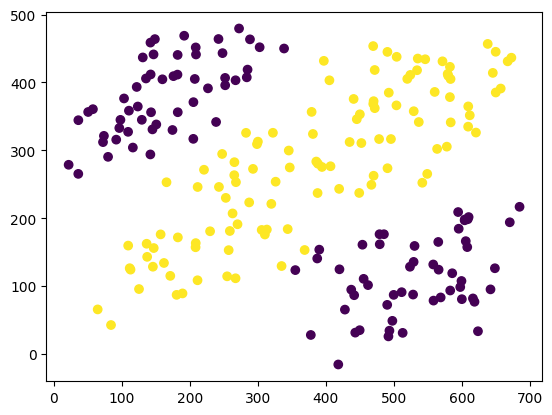

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])
pred = pipe.fit(X,y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

### Metrics

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv("/Users/elifyildiz/Desktop/creditcard.csv")[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [24]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [25]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

np.int64(172)

In [26]:
lr = LogisticRegression()
#??lr.score

In [27]:
from sklearn.model_selection import GridSearchCV

def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision,
             'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y)



NameError: name 'IsolationForest' is not defined

In [28]:
#from sklearn.metrics import precision_score, recall_score
#recall_score(y, grid.predict(X))

In [29]:
pd.DataFrame(grid.cv_results_)

NameError: name 'grid' is not defined

In [30]:
from collections import Counter 
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0], shape=(80000,))

In [31]:
s = make_scorer(min_recall_precision)
??s

NameError: name 'min_recall_precision' is not defined

In [32]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'],
        df_results[score],
        label=score)
plt.legend();

NameError: name 'grid' is not defined

<Figure size 1200x400 with 0 Axes>

In [33]:
plt.figure(figsize=(12, 4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall_score', 'mean_test_precision']:
    plt.scatter(x=[_[1] for _ in df['param_class_weight']],
        y=df[score.replace('test', 'train')],
        label=score)
plt.legend();

NameError: name 'grid' is not defined

<Figure size 1200x400 with 0 Axes>

In [34]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

make_scorer(min_recall_precision, greater_is_better=False)
?make_scorer

Signature:
make_scorer(
    score_func,
    *,
    response_method='default',
    greater_is_better=True,
    **kwargs,
)
Docstring:
Make a scorer from a performance metric or loss function.

A scorer is a wrapper around an arbitrary metric or loss function that is called
with the signature `scorer(estimator, X, y_true, **kwargs)`.

It is accepted in all scikit-learn estimators or functions allowing a `scoring`
parameter.

The parameter `response_method` allows to specify which method of the estimator
should be used to feed the scoring/loss function.

Read more in the :ref:`User Guide <scoring_callable>`.

Parameters
----------
score_func : callable
    Score function (or loss function) with signature
    ``score_func(y, y_pred, **kwargs)``.

response_method : {"predict_proba", "decision_function", "predict"} or             list/tuple of such str, default=None

    Specifies the response method to use get prediction from an estimator
    (i.e. :term:`predict_proba`, :term:`decision_fun

### Meta Estimators

#### Voting Classifier


In [42]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer 
from sklego.meta import Thresholder


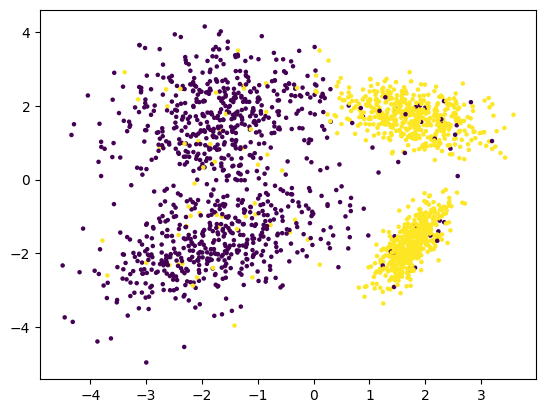

In [43]:
X, y = make_classification(n_samples=2000, n_features=2,
                           n_redundant=0, random_state=21,
                           class_sep=1.75, flip_y=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

In [44]:
#clf1 = LogisticRegression().fit(X, y)
#clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
#clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
#                        voting='soft',
#                        weights=[0.5, 0.5])
#clf3.fit(X, y)
#make_plots()

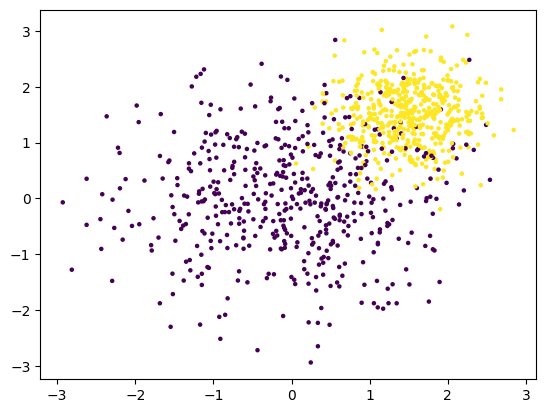

In [45]:
X, y = make_blobs(1000, centers=[(0,0), (1.5, 1.5)], cluster_std=[1, 0.5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

In [46]:
m1 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1).fit(X, y)
m2 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.9).fit(X, y)

In [50]:
pipe = Pipeline([
    ("model", Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1))
])

mod = GridSearchCV(estimator=pipe,
                   param_grid={"model__threshold": np.linspace(0.1, 0.9, 50)}, 
                   scoring={"precision": make_scorer(precision_score),
                            "recall": make_scorer(recall_score),
                            "accuracy": make_scorer(accuracy_score)},
                   refit="precision",
                   cv=5)

mod.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        Thresholder(model=LogisticRegression(),
                                                    threshold=0.1))]),
             param_grid={'model__threshold': array([0.1       , 0.11632653, 0.13265306, 0.14897959, 0.16530612,
       0.18163265, 0.19795918, 0.21428571, 0.23061224, 0.24693878,
       0.26326531, 0.27959184, 0.29591837, 0.3122449 , 0.32857143,
       0.34489796, 0.36122449, 0.37755102, 0.39387755, 0...
       0.67142857, 0.6877551 , 0.70408163, 0.72040816, 0.73673469,
       0.75306122, 0.76938776, 0.78571429, 0.80204082, 0.81836735,
       0.83469388, 0.85102041, 0.86734694, 0.88367347, 0.9       ])},
             refit='precision',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

### Human Learn

In [51]:
%pip install human-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
import numpy as np
import pandas as pd

from hulearn.datasets import load_titanic
from sklearn.model_selection import GridSearchCV

In [53]:
df = load_titanic(as_frame=True)
X, y = df.drop(columns=['survived']), df['survived']

In [54]:
df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [55]:
def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)

In [57]:
#fare_based(X)

In [61]:
from hulearn.classification import FunctionClassifier

mod = FunctionClassifier(fare_based, threshold=10)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer 

grid = GridSearchCV(mod,
                    cv=2,
                    param_grid={'threshold' : np.linspace(0, 100, 30)},
                    scoring={'accuracy': make_scorer(accuracy_score),
                            'precision': make_scorer(precision_score),
                            'recall': make_scorer(recall_score)},
                   refit='accuracy')

grid.fit(X, y)
            

GridSearchCV(cv=2,
             estimator=FunctionClassifier(func=<function fare_based at 0x138aba980>,
                                          threshold=10),
             param_grid={'threshold': array([  0.        ,   3.44827586,   6.89655172,  10.34482759,
        13.79310345,  17.24137931,  20.68965517,  24.13793103,
        27.5862069 ,  31.03448276,  34.48275862,  37.93103448,
        41.37931034,  44.82758621,  48.27586207,  51.72413793,
        55.17241379,  58.62068966,  62.06896552,  65.51724138,
        68.96551724,  72.4137931 ,  75.86206897,  79.31034483,
        82.75862069,  86.20689655,  89.65517241,  93.10344828,
        96.55172414, 100.        ])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

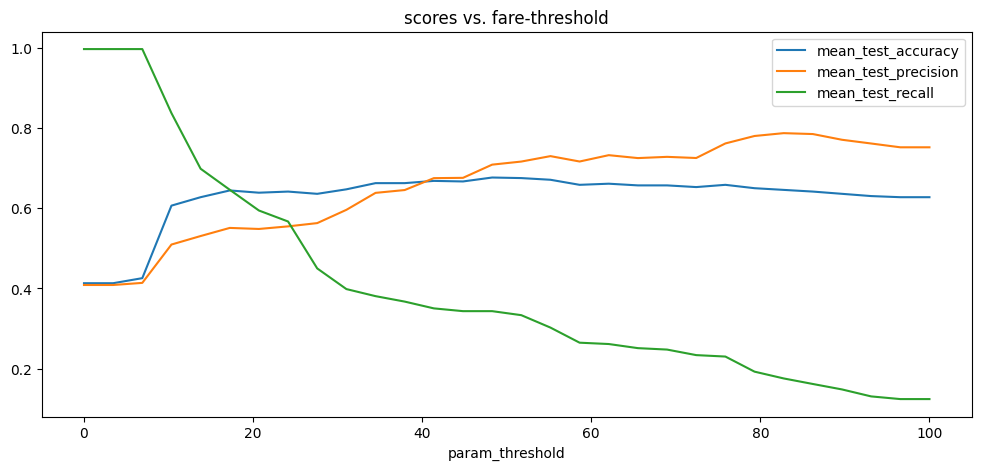

In [65]:
score_df = (pd.DataFrame(grid.cv_results_)
            .set_index('param_threshold')
            [['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']])

score_df.plot(figsize=(12, 5), title="scores vs. fare-threshold");
                

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:

from hulearn.datasets import load_titanic

df = load_titanic(as_frame=True)
df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [79]:
X, y = df.drop(columns=['survived']), df['survived']


In [80]:
import numpy as np
from hulearn.classification import FunctionClassifier

def fare_based(dataf, threshold=10):
    """
    The assumption is that folks who paid more are wealthier and are more
    likely to have recieved access to lifeboats.
    """
    return np.array(dataf['fare'] > threshold).astype(int)

In [72]:
mod = FunctionClassifier(fare_based, threshold=10)


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

# Note the threshold keyword argument in this function.
def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)

# Pay attention here, we set the threshold argument in here.
mod = FunctionClassifier(fare_based, threshold=10)

# The GridSearch object can now "grid-search" over this argument.
# We also add a bunch of metrics to our approach so we can measure.
grid = GridSearchCV(mod,
                    cv=2,
                    param_grid={'threshold': np.linspace(0, 100, 30)},
                    scoring={'accuracy': make_scorer(accuracy_score),
                             'precision': make_scorer(precision_score),
                             'recall': make_scorer(recall_score)},
                    refit='accuracy')
grid.fit(X, y);

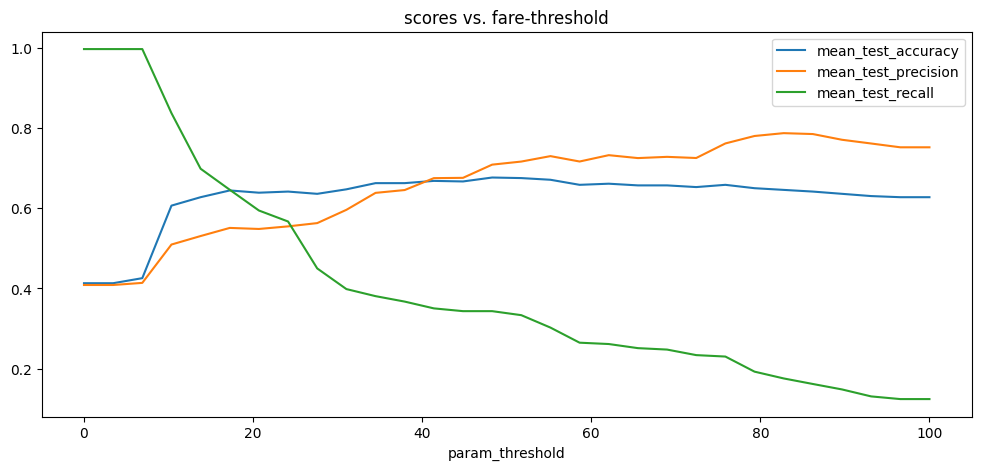

In [81]:
import pandas as pd

score_df = (pd.DataFrame(grid.cv_results_)
  .set_index('param_threshold')
  [['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']])

score_df.plot(figsize=(12, 5), title="scores vs. fare-threshold");